# **Imbalance Learn**
> Date: 2021/12/14<br>
> TA: Chiao-Ya, Hsu

In [1]:
! pip install imblearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

make_classification
- n_samples: The number of samples.
- n_features: The total number of features.
- n_informative: The number of informative features.
- n_redundant: The number of redundant features.
- n_classes: The number of classes (or labels) of the classification problem.
- n_clusters_per_class: The number of clusters per class.
- weights: The proportions of samples assigned to each class.
- class_sep: The factor multiplying the hypercube size. Larger values spread out the clusters/classes and make the classification task easier.

Size of X: (1000, 2)
Size of y: (1000,)

Number of instances for different classes:  Counter({2: 972, 1: 15, 0: 13})


<Axes: title={'center': 'Count (target)'}, xlabel='target'>

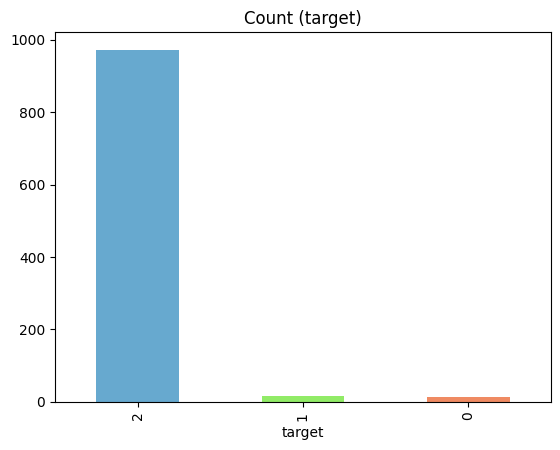

In [3]:
# Create an imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=2,
                               n_informative=2, n_redundant=0,
                               n_classes=3,
                               n_clusters_per_class=1,
                               weights=[0.01, 0.01, 0.98],
                               class_sep=0.8, random_state=0)

print('Size of X:', X.shape)
print('Size of y:', y.shape)
print('\nNumber of instances for different classes: ', Counter(y))

df = pd.DataFrame(X)
df['target'] = y
df.target.value_counts().plot(kind='bar', title='Count (target)', color=['#67a9cf', '#91eb67', '#ef8a62'])

Text(0.5, 1.0, 'Imbalanced dataset')

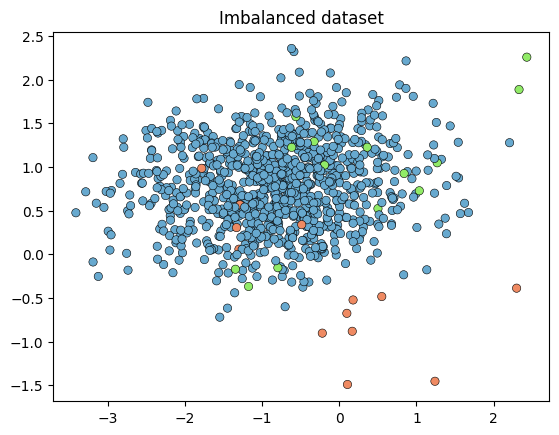

In [4]:
# Visualize the imbalanced dataset
colors = ['#ef8a62' if v == 0 else '#91eb67' if v == 1 else '#67a9cf' for v in y]
plt.scatter(X[:, 0],
            X[:, 1],
            c = colors,
            linewidth =  0.4,
            edgecolor = 'black')
plt.title('Imbalanced dataset')

In [5]:
# Create a function for visualizing
def plot_resampling(x_re, y_re, method):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    colors = ['#ef8a62' if v == 0 else '#91eb67' if v == 1 else '#67a9cf' for v in y]
    ax1.scatter(X[:, 0],
                X[:, 1],
                c = colors,
                linewidth =  0.4,
                edgecolor = 'black')
    ax1.set_title('Imbalanced dataset')

    colors = ['#ef8a62' if v == 0 else '#91eb67' if v == 1 else '#67a9cf' for v in y_re]
    ax2.scatter(x_re[:, 0],
                x_re[:, 1],
                c = colors,
                linewidth =  0.4,
                edgecolor = 'black')
    ax2.set_title(method + ' dataset')
    return fig

# I. Undersampling

## 1. NearMiss
* **sampling_strategy**: sampling information to sample the data set, default=’auto’:
  - 'majority': resample only the majority class;
  - 'not minority': resample all classes but the minority class;
  - 'not majority': resample all classes but the majority class;
  - 'all': resample all classes;
  - 'auto': equivalent to 'not minority'.
  - `a float`: ratio $\alpha_{us} = N_{m} / N_{rM}$, where $N_{m}$ is the number of samples in the minority class, and $N_{rM}$ is the number of samples in the majority class after resampling, for example *sampling_strategy=0.1*. Only available for **binary classification**. An error is raised for multi-class classification
  - `a dict`: the keys correspond to the targeted classes, the values correspond to the desired number of samples for each targeted class
* **n_neighbors**: size of the neighbourhood to consider to compute the average distance to the minority point samples, default=3.

    

### (1) Majority

Size of resampling X: (41, 2)
Size of resampling y: (41,)

Imbalanced dataset:  Counter({2: 972, 1: 15, 0: 13})
Resampling dataset:  Counter({1: 15, 0: 13, 2: 13})


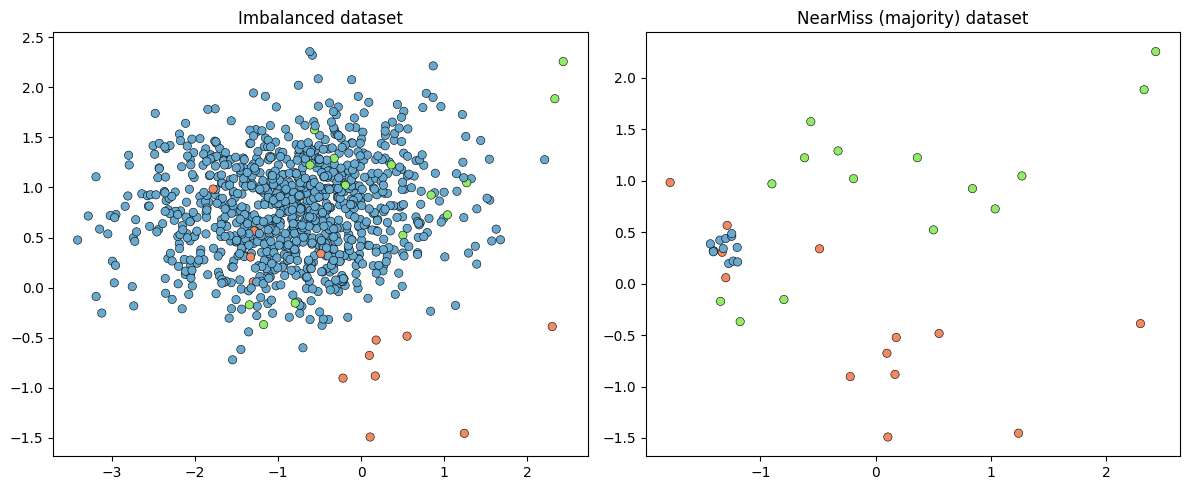

In [6]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(sampling_strategy = 'majority')
x_re, y_re = nm.fit_resample(X, y)

print('Size of resampling X:', x_re.shape)
print('Size of resampling y:', y_re.shape)
print('\nImbalanced dataset: ', Counter(y))
print('Resampling dataset: ', Counter(y_re))

fig = plot_resampling(x_re, y_re, 'NearMiss (majority)')
fig.tight_layout()

### (2) Not minority

Size of resampling X: (39, 2)
Size of resampling y: (39,)

Imbalanced dataset:  Counter({2: 972, 1: 15, 0: 13})
Resampling dataset:  Counter({0: 13, 1: 13, 2: 13})


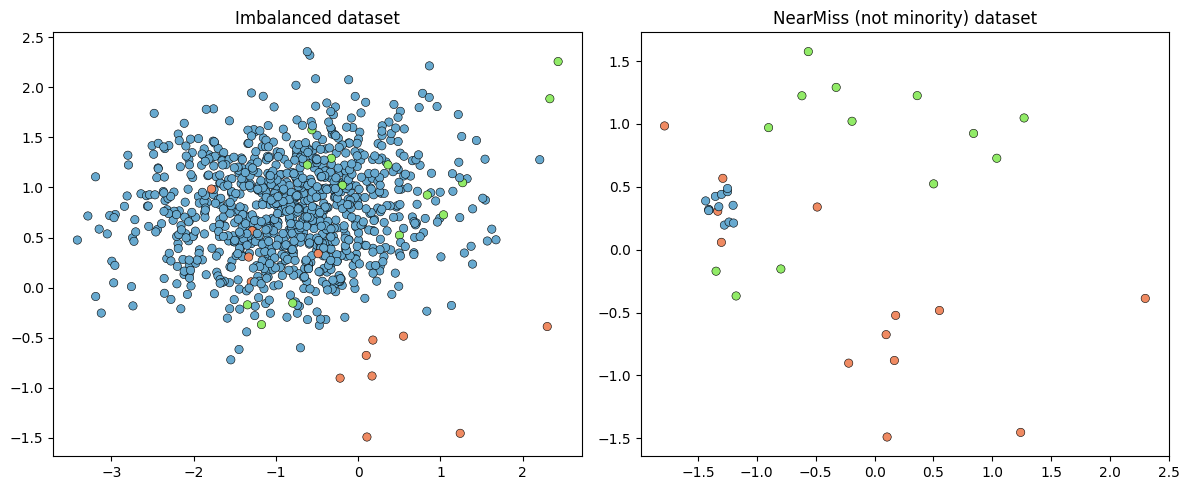

In [7]:
nm = NearMiss(sampling_strategy = 'not minority')
x_re, y_re = nm.fit_resample(X, y)

print('Size of resampling X:', x_re.shape)
print('Size of resampling y:', y_re.shape)
print('\nImbalanced dataset: ', Counter(y))
print('Resampling dataset: ', Counter(y_re))

fig = plot_resampling(x_re, y_re, 'NearMiss (not minority)')
fig.tight_layout()

### (2) Not majority

Size of resampling X: (998, 2)
Size of resampling y: (998,)

Imbalanced dataset:  Counter({2: 972, 1: 15, 0: 13})
Resampling dataset:  Counter({2: 972, 0: 13, 1: 13})


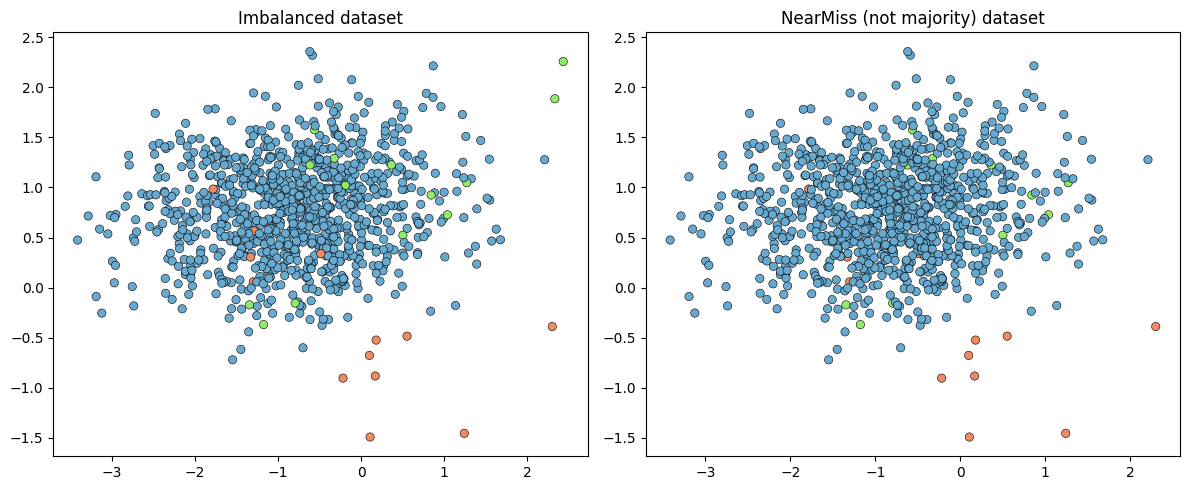

In [8]:
nm = NearMiss(sampling_strategy = 'not majority')
x_re, y_re = nm.fit_resample(X, y)

print('Size of resampling X:', x_re.shape)
print('Size of resampling y:', y_re.shape)
print('\nImbalanced dataset: ', Counter(y))
print('Resampling dataset: ', Counter(y_re))

fig = plot_resampling(x_re, y_re, 'NearMiss (not majority)')
fig.tight_layout()

### (2) All

Size of resampling X: (39, 2)
Size of resampling y: (39,)

Imbalanced dataset:  Counter({2: 972, 1: 15, 0: 13})
Resampling dataset:  Counter({0: 13, 1: 13, 2: 13})


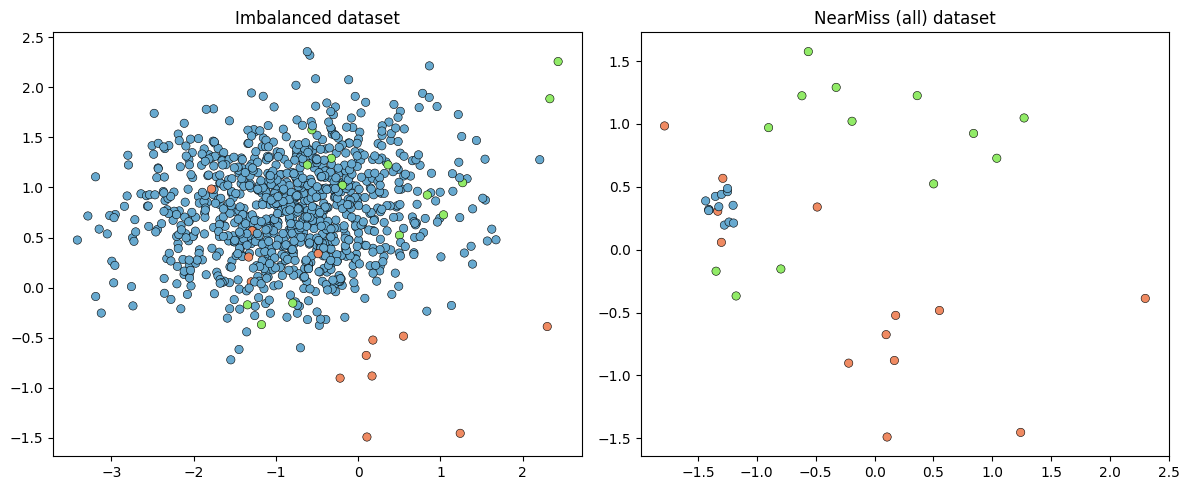

In [9]:
nm = NearMiss(sampling_strategy = 'all')
x_re, y_re = nm.fit_resample(X, y)

print('Size of resampling X:', x_re.shape)
print('Size of resampling y:', y_re.shape)
print('\nImbalanced dataset: ', Counter(y))
print('Resampling dataset: ', Counter(y_re))

fig = plot_resampling(x_re, y_re, 'NearMiss (all)')
fig.tight_layout()

### (2) By dictionary

Size of resampling X: (126, 2)
Size of resampling y: (126,)

Imbalanced dataset:  Counter({2: 972, 1: 15, 0: 13})
Resampling dataset:  Counter({2: 100, 0: 13, 1: 13})


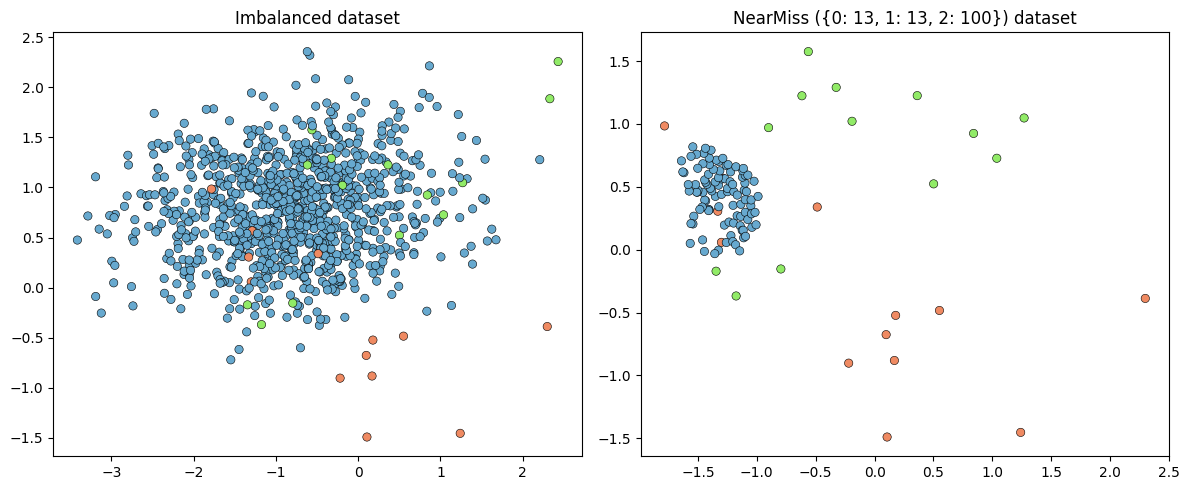

In [10]:
nm = NearMiss(sampling_strategy = {0: 13, 1: 13, 2: 100})
x_re, y_re = nm.fit_resample(X, y)

print('Size of resampling X:', x_re.shape)
print('Size of resampling y:', y_re.shape)
print('\nImbalanced dataset: ', Counter(y))
print('Resampling dataset: ', Counter(y_re))

fig = plot_resampling(x_re, y_re, 'NearMiss ({0: 13, 1: 13, 2: 100})')
fig.tight_layout()

## 2.Cluster Centroids
* **sampling_strategy**: sampling information to sample the data set, float, str, dict, callable, default=’auto’.
* **voting**: voting strategy to generate the new samples:
    * `'hard'`: the nearest-neighbors of the centroids found using the clustering algorithm will be used
    * `'soft'`: the centroids found by the clustering algorithm will be used
    * `'auto'`: if the input is sparse, it will default on 'hard' otherwise, 'soft' will be used

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Size of resampling X: (39, 2)
Size of resampling y: (39,)

Imbalanced dataset:  Counter({2: 972, 1: 15, 0: 13})
Resampling dataset:  Counter({0: 13, 1: 13, 2: 13})


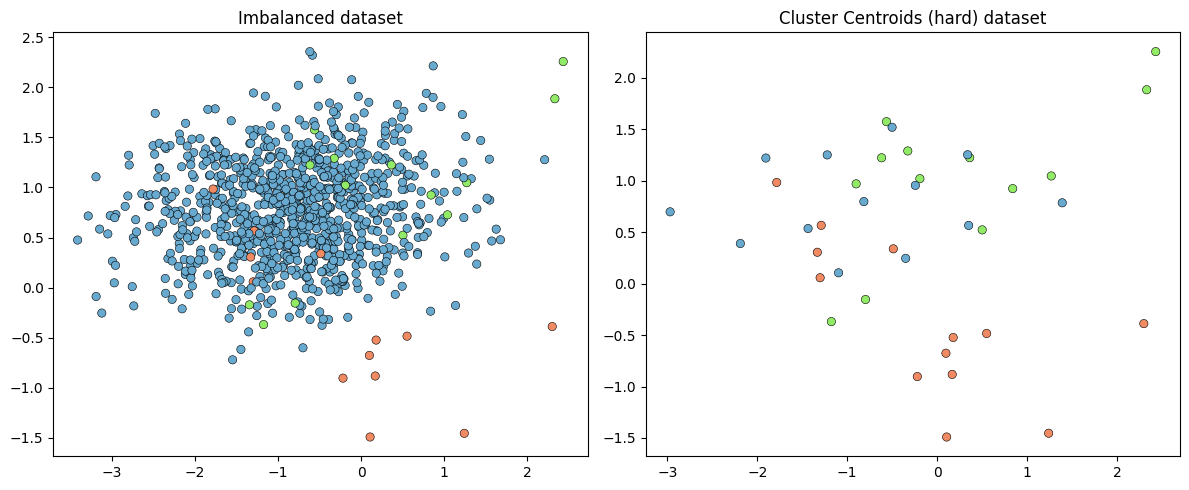

In [11]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(voting='hard')
x_re, y_re = cc.fit_resample(X, y)

print('Size of resampling X:', x_re.shape)
print('Size of resampling y:', y_re.shape)
print('\nImbalanced dataset: ', Counter(y))
print('Resampling dataset: ', Counter(y_re))

fig = plot_resampling(x_re, y_re, 'Cluster Centroids (hard)')
fig.tight_layout()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Size of resampling X: (39, 2)
Size of resampling y: (39,)

Imbalanced dataset:  Counter({2: 972, 1: 15, 0: 13})
Resampling dataset:  Counter({0: 13, 1: 13, 2: 13})


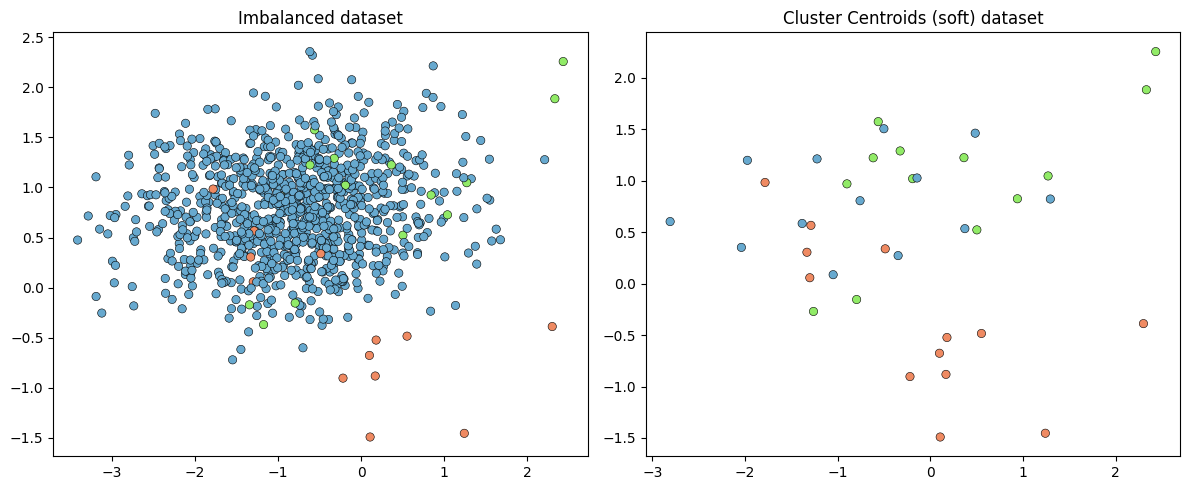

In [12]:
cc = ClusterCentroids(voting='soft')
x_re, y_re = cc.fit_resample(X, y)

print('Size of resampling X:', x_re.shape)
print('Size of resampling y:', y_re.shape)
print('\nImbalanced dataset: ', Counter(y))
print('Resampling dataset: ', Counter(y_re))

fig = plot_resampling(x_re, y_re, 'Cluster Centroids (soft)')
fig.tight_layout()

## 3.Condensed NN
* **sampling_strategy**: sampling information to sample the data set, float, str, dict, callable, default=’auto’.
* **n_neighbors**: size of the neighbourhood to consider to compute the nearest neighbors, default=None. If None, a KNeighborsClassifier with a 1-NN rules will be used.

Size of resampling X: (56, 2)
Size of resampling y: (56,)

Imbalanced dataset:  Counter({2: 972, 1: 15, 0: 13})
Resampling dataset:  Counter({2: 38, 0: 13, 1: 5})


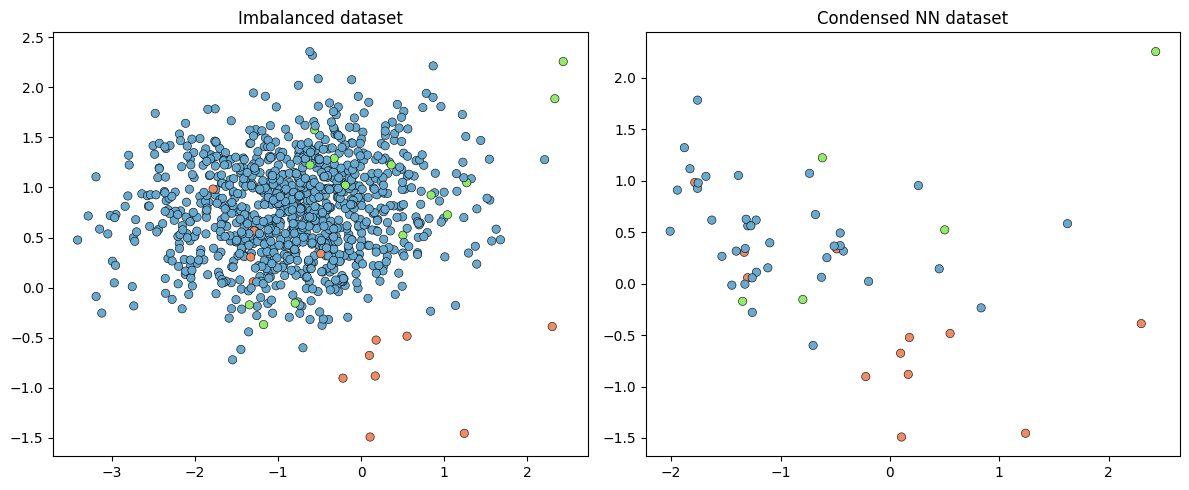

In [13]:
from imblearn.under_sampling import CondensedNearestNeighbour
cnn = CondensedNearestNeighbour()
x_re, y_re = cnn.fit_resample(X, y)

print('Size of resampling X:', x_re.shape)
print('Size of resampling y:', y_re.shape)
print('\nImbalanced dataset: ', Counter(y))
print('Resampling dataset: ', Counter(y_re))

fig = plot_resampling(x_re, y_re, 'Condensed NN')
fig.tight_layout()

## 4. Edited NN
* **sampling_strategy**: sampling information to sample the data set, float, str, dict, callable, default=’auto’.
* **n_neighbors**: size of the neighbourhood to consider to compute the nearest neighbors, default=3.
* **kind_sel**: strategy to use in order to exclude samples, default=’all’:
    * `'all'`: all neighbours will have to agree with the samples of interest to not be excluded
    * `'mode'`: the majority vote of the neighbours will be used in order to exclude a sample
    * The strategy "all" will be less conservative than 'mode', thus, more samples will be removed when kind_sel="all" generally

Size of resampling X: (931, 2)
Size of resampling y: (931,)

Imbalanced dataset:  Counter({2: 972, 1: 15, 0: 13})
Resampling dataset:  Counter({2: 918, 0: 13})


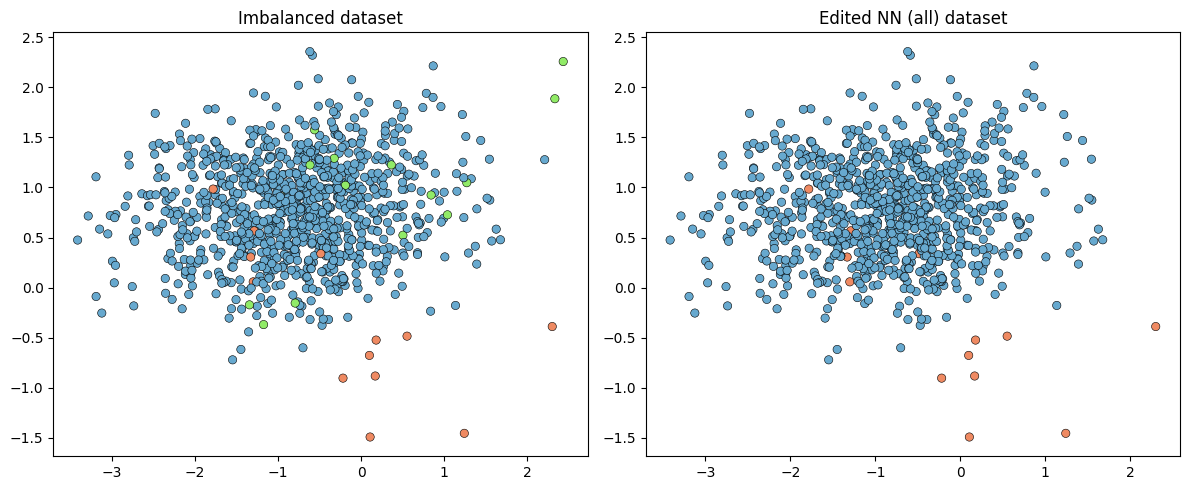

In [14]:
from imblearn.under_sampling import EditedNearestNeighbours
en = EditedNearestNeighbours(kind_sel="all")
x_re, y_re = en.fit_resample(X, y)

print('Size of resampling X:', x_re.shape)
print('Size of resampling y:', y_re.shape)
print('\nImbalanced dataset: ', Counter(y))
print('Resampling dataset: ', Counter(y_re))

fig = plot_resampling(x_re, y_re, 'Edited NN (all)')
fig.tight_layout()

Size of resampling X: (984, 2)
Size of resampling y: (984,)

Imbalanced dataset:  Counter({2: 972, 1: 15, 0: 13})
Resampling dataset:  Counter({2: 971, 0: 13})


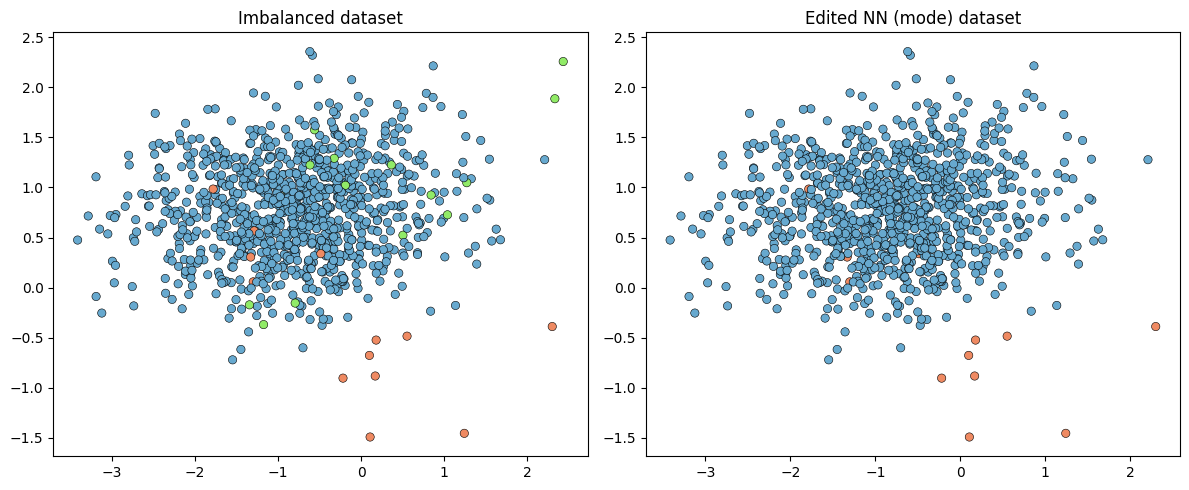

In [15]:
en = EditedNearestNeighbours(kind_sel="mode")
x_re, y_re = en.fit_resample(X, y)

print('Size of resampling X:', x_re.shape)
print('Size of resampling y:', y_re.shape)
print('\nImbalanced dataset: ', Counter(y))
print('Resampling dataset: ', Counter(y_re))

fig = plot_resampling(x_re, y_re, 'Edited NN (mode)')
fig.tight_layout()

## 5.Neighborhood Cleaning Rule
* **sampling_strategy**: sampling information to sample the data set, float, str, dict, callable, default=’auto’.
* **n_neighbors**: size of the neighbourhood to consider to compute the nearest neighbors, default=None.
* **kind_sel**: strategy to use in order to exclude samples, {“all”, “mode”}, default=’all’

Size of resampling X: (966, 2)
Size of resampling y: (966,)

Imbalanced dataset:  Counter({2: 972, 1: 15, 0: 13})
Resampling dataset:  Counter({2: 953, 0: 13})


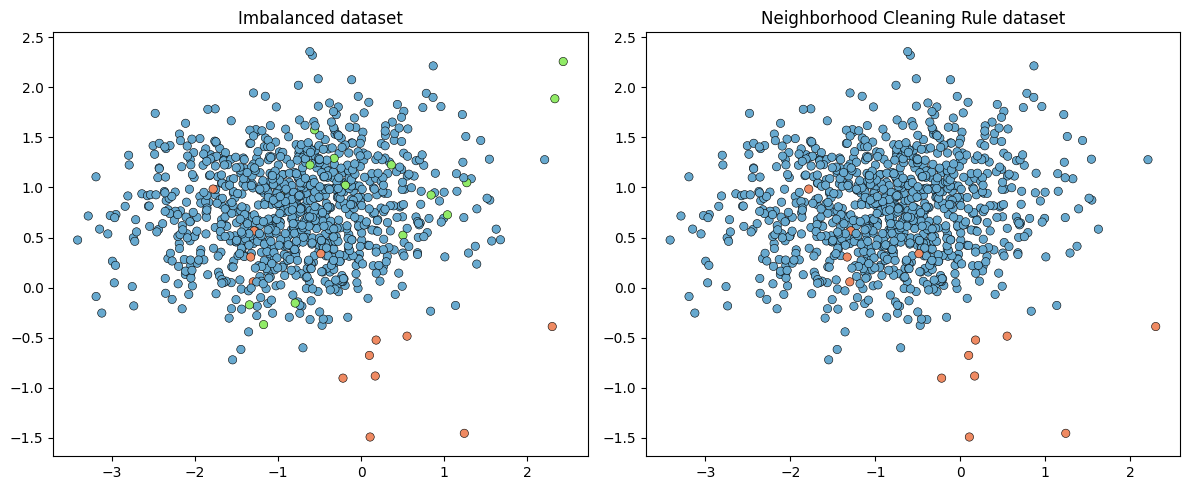

In [16]:
from imblearn.under_sampling import NeighbourhoodCleaningRule
ecr = NeighbourhoodCleaningRule()
x_re, y_re = ecr.fit_resample(X, y)

print('Size of resampling X:', x_re.shape)
print('Size of resampling y:', y_re.shape)
print('\nImbalanced dataset: ', Counter(y))
print('Resampling dataset: ', Counter(y_re))

fig = plot_resampling(x_re, y_re, 'Neighborhood Cleaning Rule')
fig.tight_layout()

## 6. Tomek links
* **sampling_strategy**: sampling information to sample the data set, float, str, dict, callable, default=’auto’.

Size of resampling X: (979, 2)
Size of resampling y: (979,)

Imbalanced dataset:  Counter({2: 972, 1: 15, 0: 13})
Resampling dataset:  Counter({2: 959, 0: 13, 1: 7})


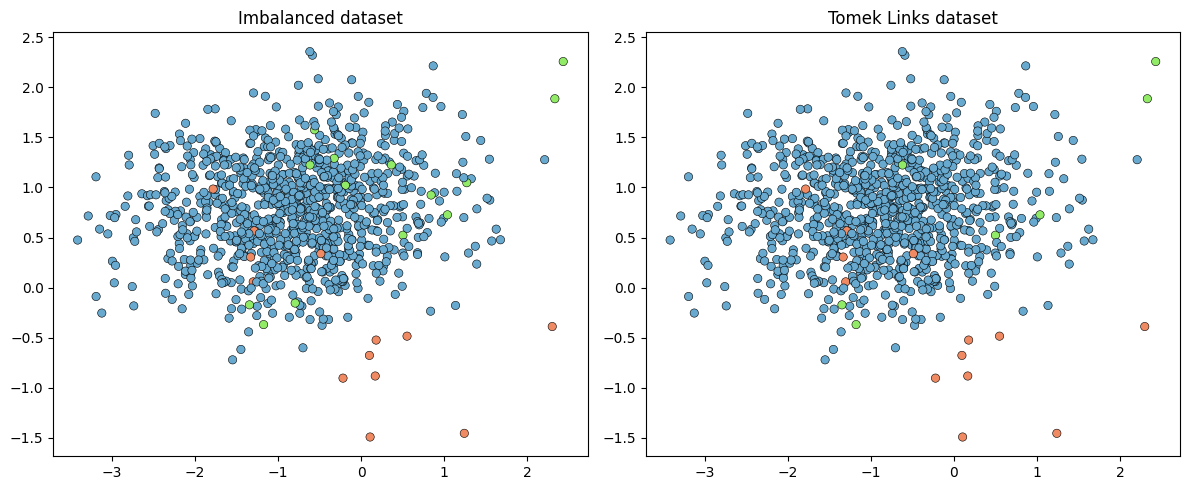

In [17]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks()
x_re, y_re = tl.fit_resample(X, y)

print('Size of resampling X:', x_re.shape)
print('Size of resampling y:', y_re.shape)
print('\nImbalanced dataset: ', Counter(y))
print('Resampling dataset: ', Counter(y_re))

fig = plot_resampling(x_re, y_re, 'Tomek Links')
fig.tight_layout()

## 7. One-Sided Selection
* **sampling_strategy**: sampling information to sample the data set, float, str, dict, callable, default=’auto’.
* **n_neighbors**: size of the neighbourhood to consider to compute the nearest neighbors, default=None.

Size of resampling X: (681, 2)
Size of resampling y: (681,)

Imbalanced dataset:  Counter({2: 972, 1: 15, 0: 13})
Resampling dataset:  Counter({2: 664, 0: 13, 1: 4})


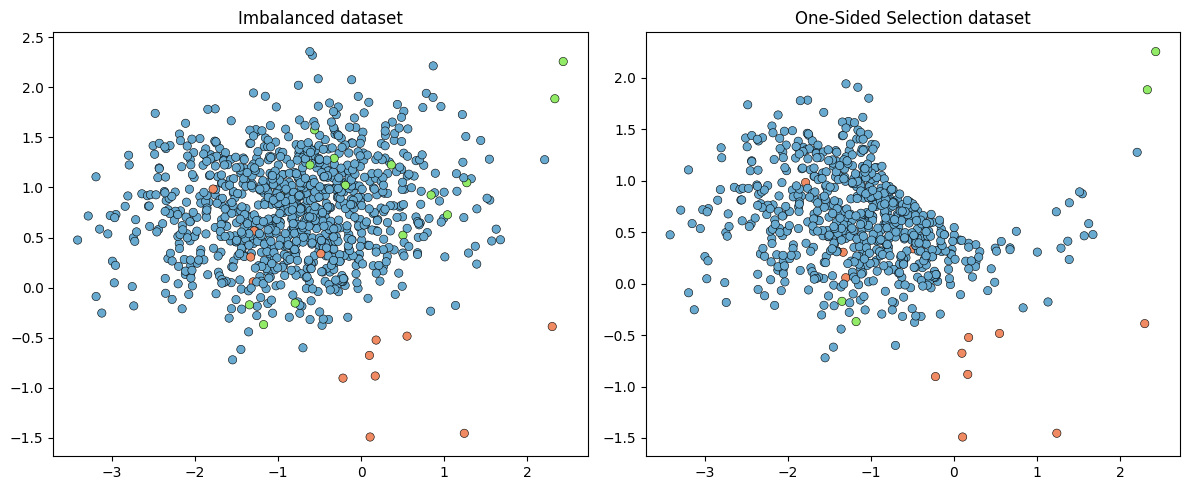

In [18]:
from imblearn.under_sampling import OneSidedSelection
oss = OneSidedSelection()
x_re, y_re = oss.fit_resample(X, y)

print('Size of resampling X:', x_re.shape)
print('Size of resampling y:', y_re.shape)
print('\nImbalanced dataset: ', Counter(y))
print('Resampling dataset: ', Counter(y_re))

fig = plot_resampling(x_re, y_re, 'One-Sided Selection')
fig.tight_layout()

# II. Oversampling

## 1. SMOTE
* **sampling_strategy**: sampling information to sample the data set, float, str, dict, callable, default=’auto’.
* **k_neighbors**: number of nearest neighbours to used to construct synthetic samples, default=5.

Size of resampling X: (2916, 2)
Size of resampling y: (2916,)

Imbalanced dataset:  Counter({2: 972, 1: 15, 0: 13})
Resampling dataset:  Counter({2: 972, 1: 972, 0: 972})


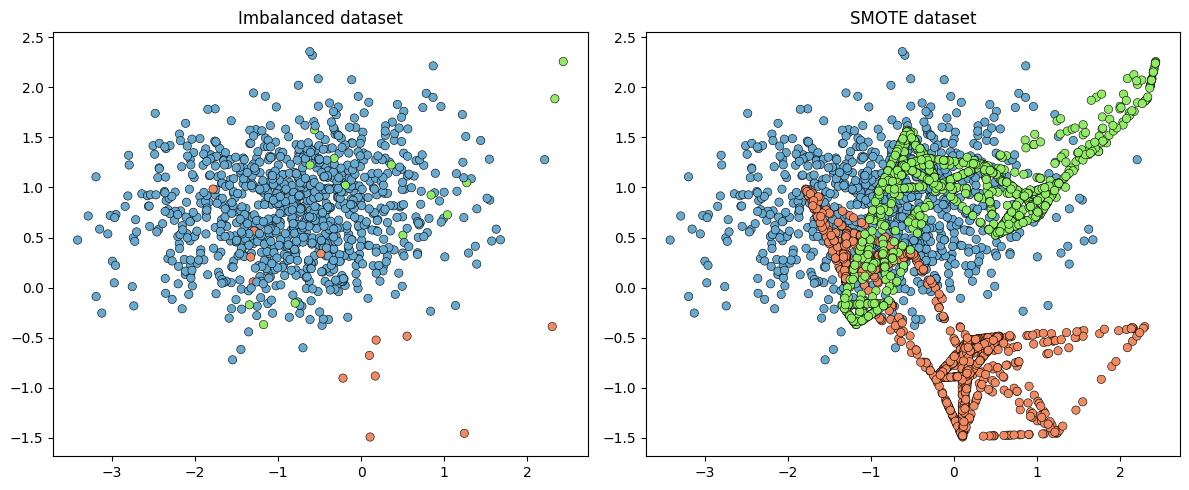

In [19]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_re, y_re = smote.fit_resample(X, y)

print('Size of resampling X:', x_re.shape)
print('Size of resampling y:', y_re.shape)
print('\nImbalanced dataset: ', Counter(y))
print('Resampling dataset: ', Counter(y_re))

fig = plot_resampling(x_re, y_re, 'SMOTE')
fig.tight_layout()

## 2.Borderline-SMOTE
* **sampling_strategy**: sampling information to sample the data set, float, str, dict, callable, default=’auto’.
* **k_neighbors**: number of nearest neighbours to used to construct synthetic samples, default=5.
* **m_neighbors**: number of nearest neighbours to use to determine if a minority sample is in danger, default=10.

Size of resampling X: (2916, 2)
Size of resampling y: (2916,)

Imbalanced dataset:  Counter({2: 972, 1: 15, 0: 13})
Resampling dataset:  Counter({2: 972, 1: 972, 0: 972})


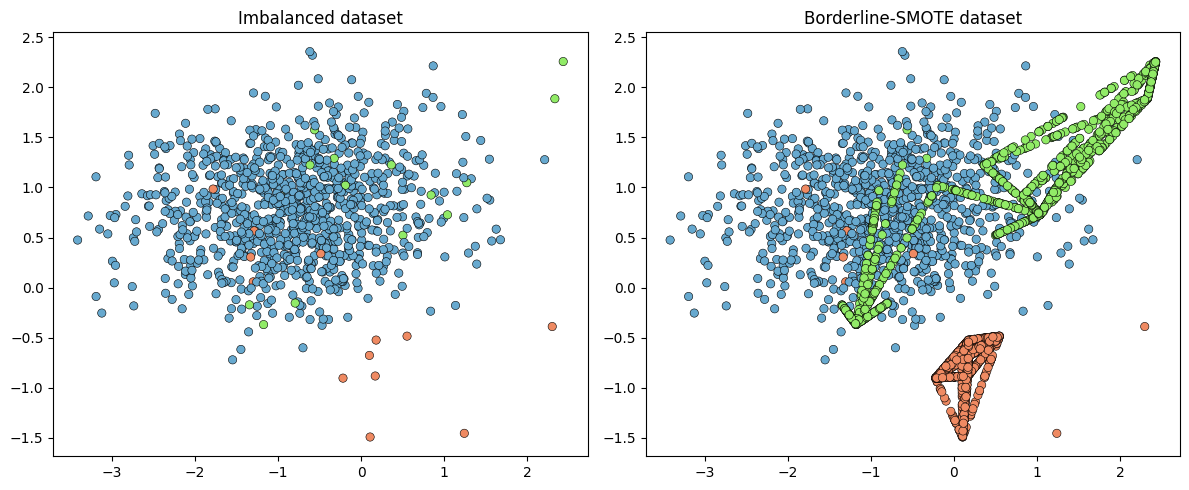

In [20]:
from imblearn.over_sampling import BorderlineSMOTE
bsmote = BorderlineSMOTE()
x_re, y_re = bsmote.fit_resample(X, y)

print('Size of resampling X:', x_re.shape)
print('Size of resampling y:', y_re.shape)
print('\nImbalanced dataset: ', Counter(y))
print('Resampling dataset: ', Counter(y_re))

fig = plot_resampling(x_re, y_re, 'Borderline-SMOTE')
fig.tight_layout()

## 3. ADASYN
* **sampling_strategy**: sampling information to sample the data set, float, str, dict, callable, default=’auto’.
* **n_neighbors**:  number of nearest neighbours to used to construct synthetic samples, default=5.

Size of resampling X: (2922, 2)
Size of resampling y: (2922,)

Imbalanced dataset:  Counter({2: 972, 1: 15, 0: 13})
Resampling dataset:  Counter({1: 977, 0: 973, 2: 972})


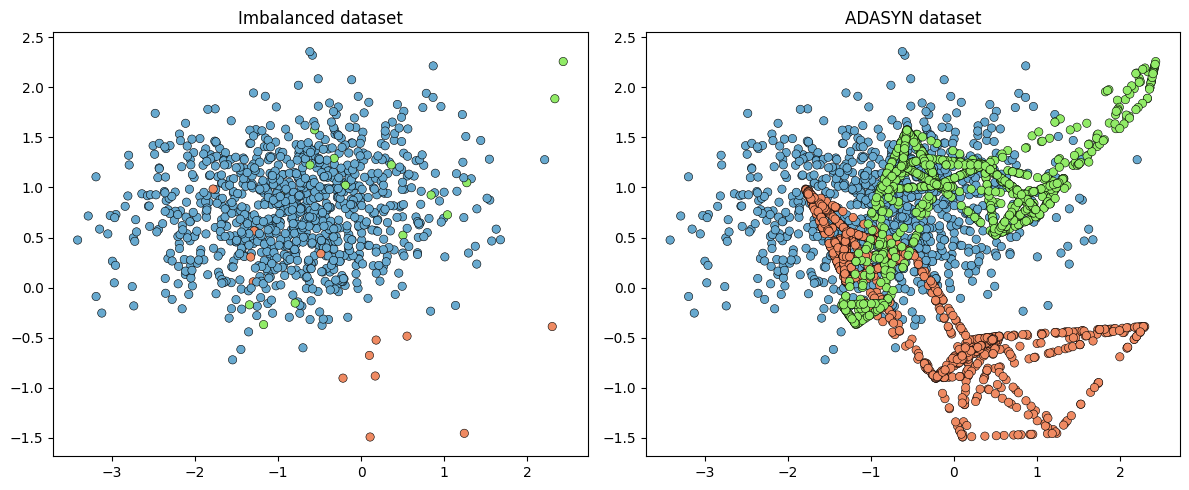

In [21]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN()
x_re, y_re = adasyn.fit_resample(X, y)

print('Size of resampling X:', x_re.shape)
print('Size of resampling y:', y_re.shape)
print('\nImbalanced dataset: ', Counter(y))
print('Resampling dataset: ', Counter(y_re))

fig = plot_resampling(x_re, y_re, 'ADASYN')
fig.tight_layout()

# III. Combination model

## 1. SMOTE + ENN
* **sampling_strategy**: sampling information to sample the data set, float, str, dict, callable, default=’auto’.
* **smote**: the SMOTE object to use, if not given, a SMOTE object with default parameters will be given, default=None.
* **enn**: the EditedNearestNeighbours object to use, if not given, a EditedNearestNeighbours object with sampling strategy=’all’ will be given, default=None


Size of resampling X: (1971, 2)
Size of resampling y: (1971,)

Imbalanced dataset:  Counter({2: 972, 1: 15, 0: 13})
Resampling dataset:  Counter({0: 802, 1: 645, 2: 524})


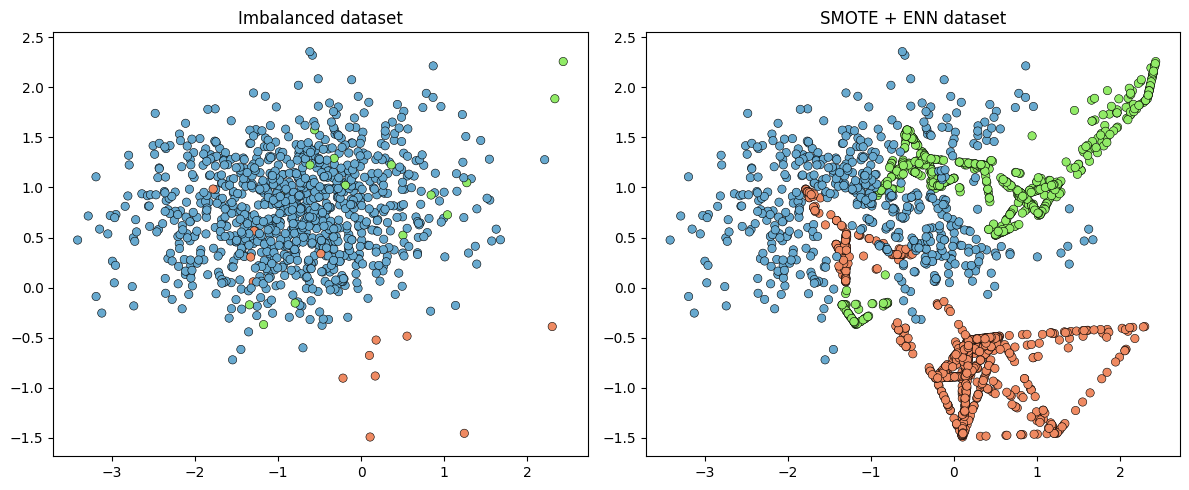

In [22]:
from imblearn.combine import SMOTEENN
smotenn = SMOTEENN(smote = SMOTE(), enn = EditedNearestNeighbours(sampling_strategy='all'))
x_re, y_re = smotenn.fit_resample(X, y)

print('Size of resampling X:', x_re.shape)
print('Size of resampling y:', y_re.shape)
print('\nImbalanced dataset: ', Counter(y))
print('Resampling dataset: ', Counter(y_re))

fig = plot_resampling(x_re, y_re, 'SMOTE + ENN')
fig.tight_layout()

## 2. SMOTE + Tomek Links
* **sampling_strategy**: sampling information to sample the data set, float, str, dict, callable, default=’auto’.
* **smote**: the SMOTE object to use, if not given, a SMOTE object with default parameters will be given, default=None.
* **tomek**: the TomekLinks object to use, if not given, a TomekLinks object with sampling strategy=’all’ will be given, default=None

Size of resampling X: (2881, 2)
Size of resampling y: (2881,)

Imbalanced dataset:  Counter({2: 972, 1: 15, 0: 13})
Resampling dataset:  Counter({2: 972, 1: 972, 0: 937})


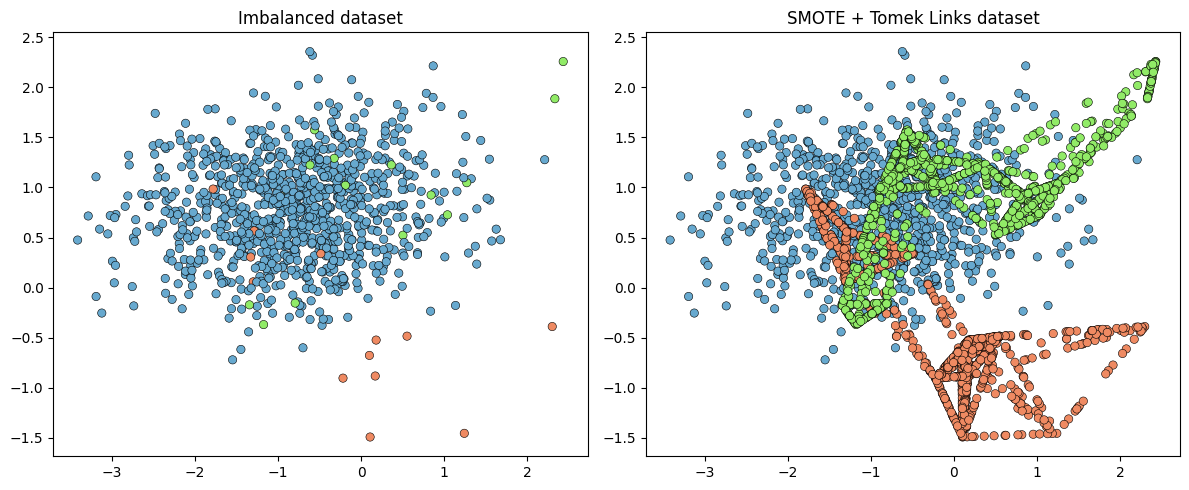

In [23]:
from imblearn.combine import SMOTETomek
smotetl = SMOTETomek(smote = SMOTE(), tomek = TomekLinks(sampling_strategy='majority'))
x_re, y_re = smotetl.fit_resample(X, y)

print('Size of resampling X:', x_re.shape)
print('Size of resampling y:', y_re.shape)
print('\nImbalanced dataset: ', Counter(y))
print('Resampling dataset: ', Counter(y_re))

fig = plot_resampling(x_re, y_re, 'SMOTE + Tomek Links')
fig.tight_layout()

# IV. Training  model
Illustrate the influence of the different resampling methods on imbalanced dataset using a linear SVM classifier.

In [24]:
def plot_decision_function(X, y, clf, ax):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k')

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


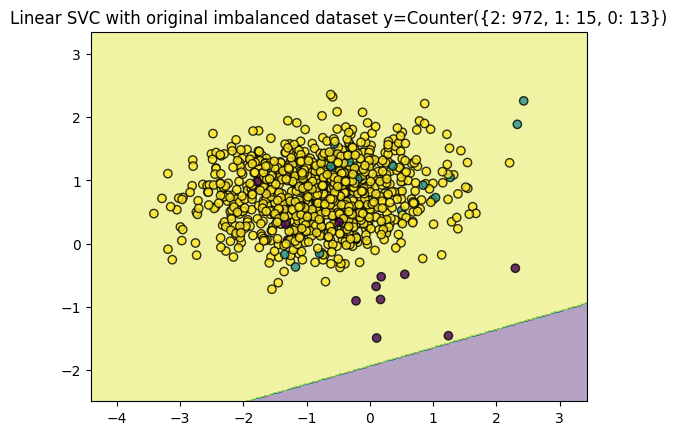

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warning

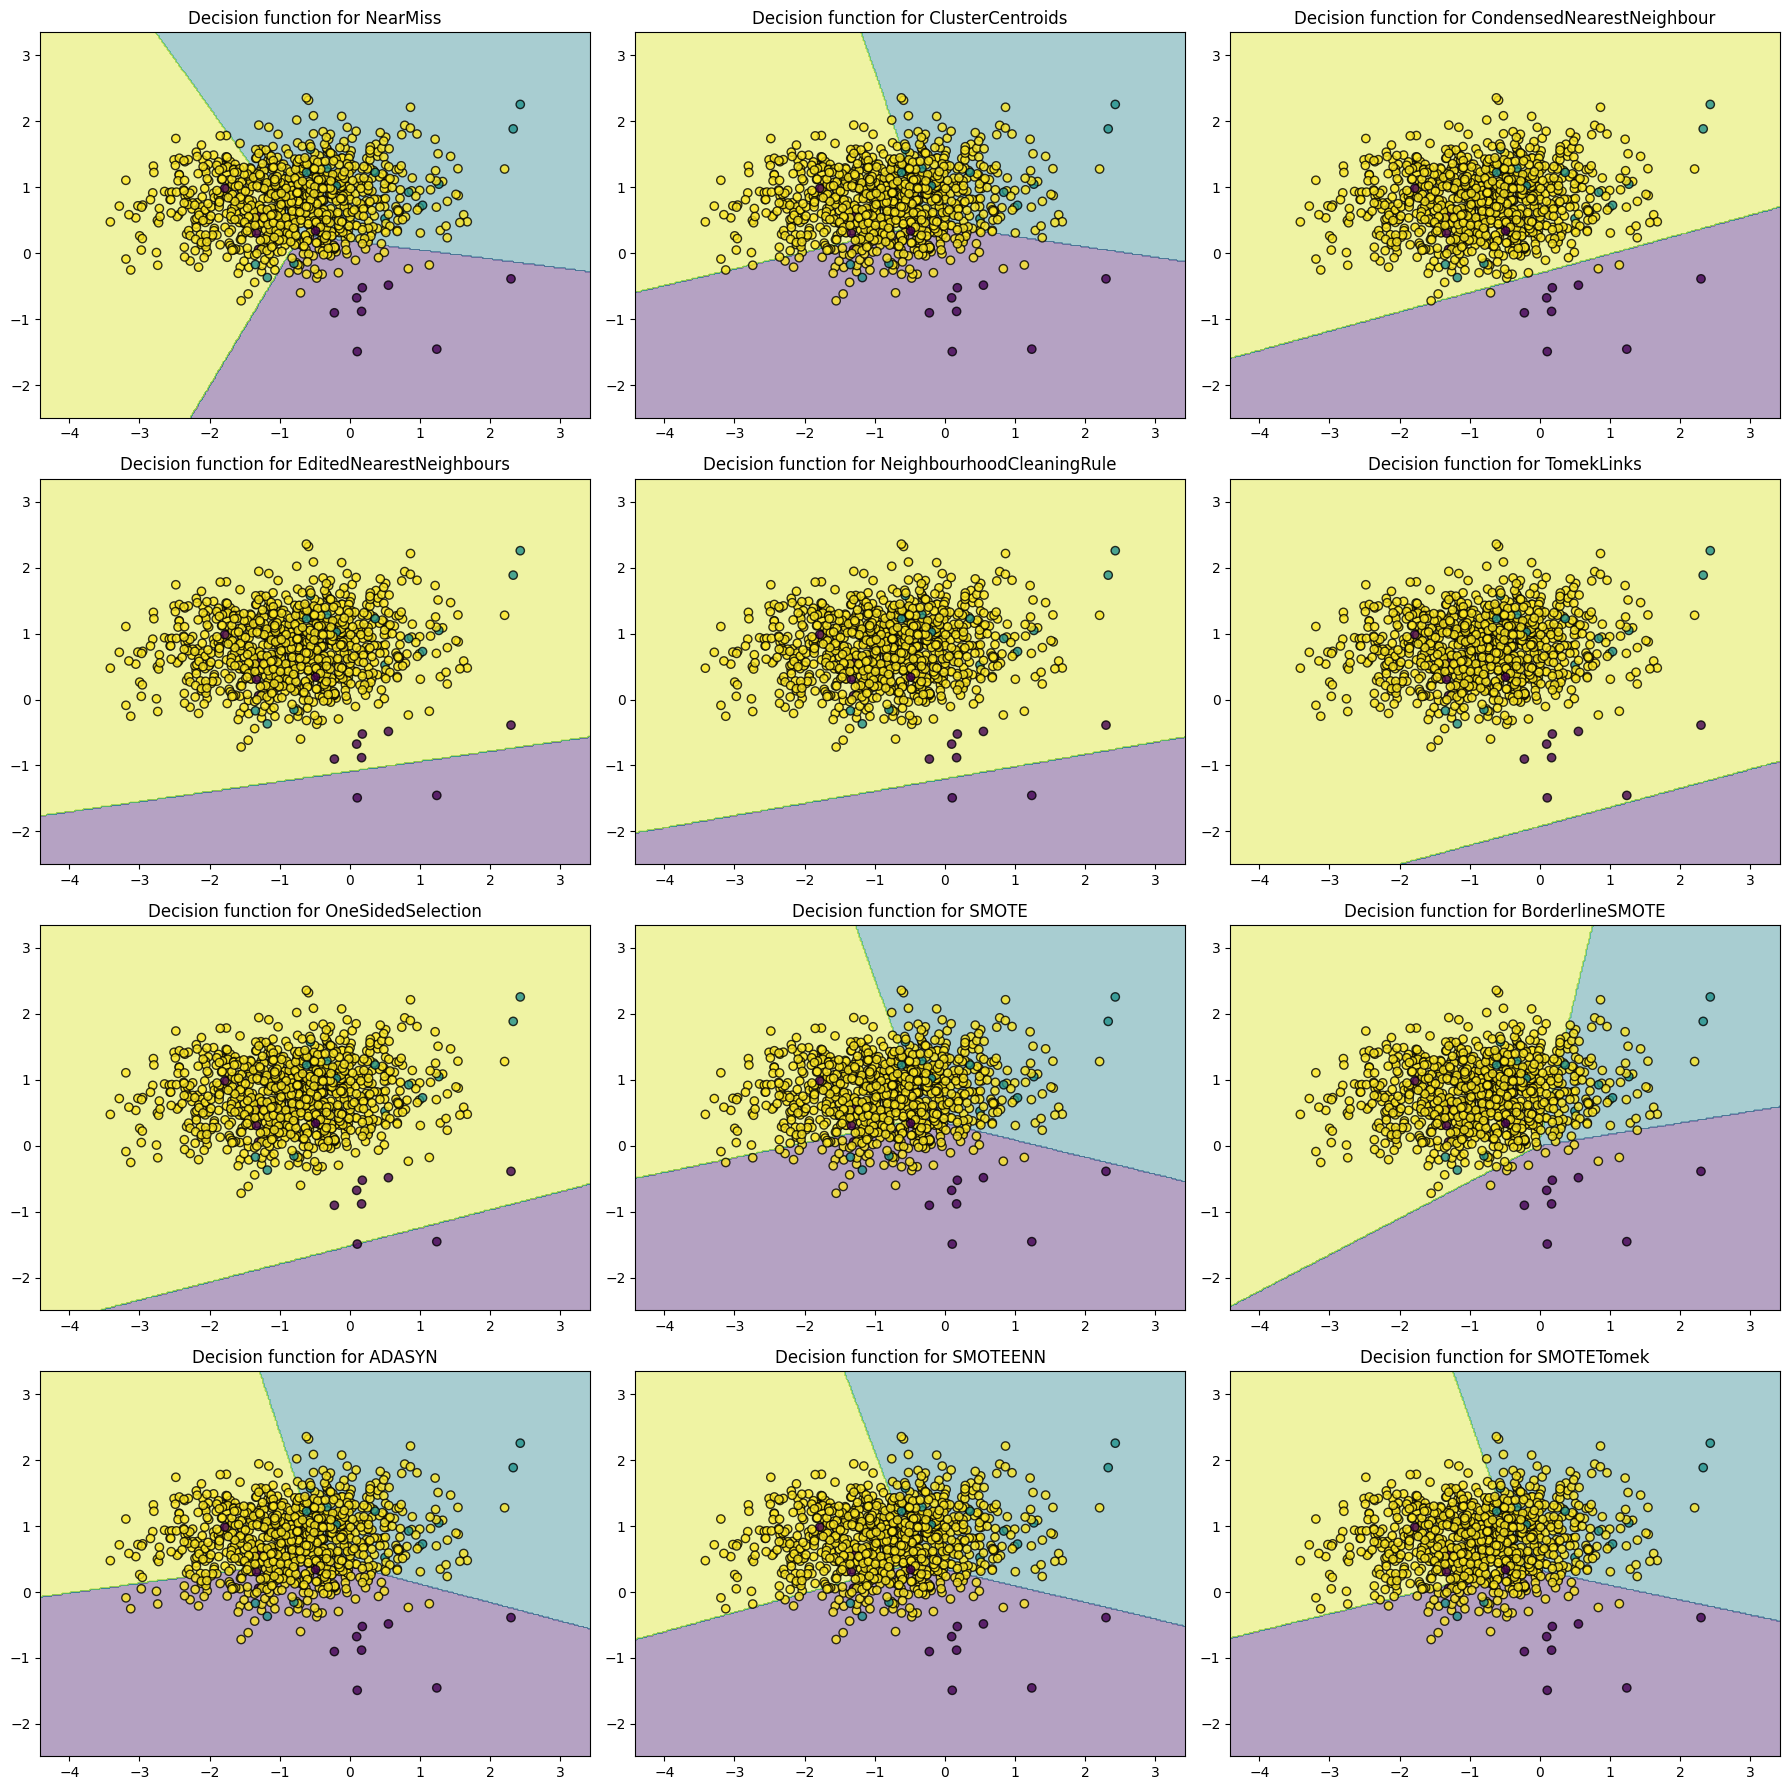

In [25]:
from sklearn.svm import LinearSVC
from imblearn.pipeline import make_pipeline

# Train Linear SVC on imbalanced dataset
clf = LinearSVC().fit(X, y)
plot_decision_function(X, y, clf, plt)
plt.title('Linear SVC with original imbalanced dataset y={}'.format(Counter(y)))
plt.show()

# Train Linear SVC on resampling dataset
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12)) = plt.subplots(4, 3, figsize=(18, 18))
ax_arr = (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12)
resamples = [NearMiss(sampling_strategy = 'majority'),
             ClusterCentroids(voting='hard'),
             CondensedNearestNeighbour(),
             EditedNearestNeighbours(kind_sel="all"),
             NeighbourhoodCleaningRule(),
             TomekLinks(sampling_strategy='majority'),
             OneSidedSelection(),
             SMOTE(),
             BorderlineSMOTE(),
             ADASYN(),
             SMOTEENN(smote = SMOTE(), enn = EditedNearestNeighbours(sampling_strategy='all')),
             SMOTETomek(smote = SMOTE(), tomek = TomekLinks(sampling_strategy='majority'))]

for ax, sampler in zip(ax_arr, resamples):
    clf = make_pipeline(sampler, LinearSVC())
    clf.fit(X, y)
    plot_decision_function(X, y, clf, ax)
    ax.set_title('Decision function for {}'.format(sampler.__class__.__name__))
fig.tight_layout()

# Summary
**I. Undersampling**  
        1. NearMiss     
        2. Cluster Centroids    
        3. Condensed NN  
        4. Edited NN  
        5. Neighborhood Cleaning Rule  
        6. Tomek Links  
        7. One-Sided Selection  
        
**II. Oversampling**  
    1. SMOTE  
    2. Borderline-SMOTE  
    3. ADASYN
    
**III. Combination model**  
    1. SMOTE + ENN  
    2. SMOTE + Tomek Links  

**IV. Training model**  

  

  
### If any questions, please contact the TAs via TA hours, moodle, or email.